In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import gradient_decent # modulo dùng để update trọng số



<center>
<h4>  Neurol Network one - one layer </h4>
<img src="nn_model_linear_regression_simple.png" style="width:400px; margin-left:auto;margin-right:auto">
</center>


## Dataset

In [65]:
m = 1000 # Độ dài tập train

X, Y = make_regression(n_samples = m, n_features = 1,noise=20,random_state=1) # Xây dựng data gồm 1 feature, m mẫu

# Đưa về thành vector có 1 hàng
X = X.reshape((1,m))
Y = Y.reshape((1,m))

print(X)
print(Y)

[[-1.06787658e+00 -2.91594596e-01  5.08077548e-02  6.21803504e-01
  -5.45774168e-01  1.55501599e+00 -2.09752935e-01  1.78975468e+00
  -7.67803746e-01  1.47073986e+00 -2.86384915e-01 -3.64538050e-01
   4.03491642e-01  3.37220938e-01  8.64644065e-02 -1.67419581e+00
  -9.24323185e-02  5.20576337e-01  1.46089238e+00 -9.15424368e-01
  -1.61198320e-01  1.57546791e+00  7.44884536e-01  1.04499441e+00
  -2.79099641e+00 -7.47158294e-01 -1.11711069e+00 -1.09033833e+00
   8.59870972e-01  1.90915485e-01 -3.31283170e-01 -4.23478297e-01
   3.19656942e-01 -1.94504696e+00 -8.80577600e-01  8.38634747e-01
  -1.56450785e+00  8.16043684e-01 -7.33271604e-01  6.40985866e-01
  -6.74100249e-02 -2.30153870e+00 -8.57496825e-01 -6.04602969e-01
  -6.20000844e-01 -1.82420406e-01 -8.98683193e-01  1.19891788e+00
   2.10025514e+00 -1.72428208e-01  5.02740882e-01  3.85602292e-01
  -3.94689681e-01  1.00796648e+00  1.64665066e-01  3.93787731e-01
   5.85910431e-01 -2.18733459e-01 -7.22391905e-01 -2.22328143e-01
  -1.98937

Trực quan hóa

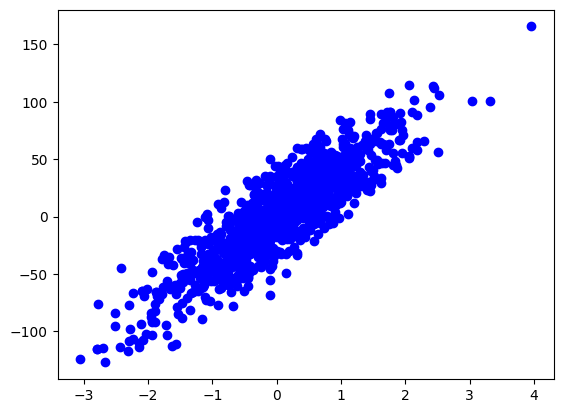

In [66]:
plt.scatter(X,Y,c="blue")

## Xác định cấu trúc Neurol Network

In [67]:
def layer_size(X,Y):
    n_x = X.shape[0] # số input_layer
    n_y = Y.shape[0] # số output_layer
    return (n_x,n_y)

In [68]:
(n_x,n_y) = layer_size(X,Y)
print(n_x)
print(n_y)

1
1


In [69]:
# Khởi tạo random các trọng số ban đầu
def random_parameters(n_x,n_y):
    W = np.random.randn(n_x,n_y) * 0.1 # tạo mảng trọng số ngẫu nhiên có kích thước n_x,n_y
    b = np.zeros((n_y,1)) # Khởi tạo mảng bias tương ứng với số output_layer

    parameters = {"W": W,
                 "b": b}
    return parameters

In [70]:
parameters = random_parameters(n_x,n_y)
print(parameters["W"])
print(parameters["b"])

[[0.09728122]]
[[0.]]


## Train - Processing

\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}

In [71]:
# Hàm tính toán output_layer với mỗi bộ trọng số trong vòng lặp
def pre_loop(X,parameters):
    W = parameters["W"]
    b = parameters["b"]

    Y_hat = W*X + b

    return Y_hat


In [72]:
Y_hat = pre_loop(X,parameters)
print(Y_hat)

[[-1.03884336e-01 -2.83666778e-02  4.94264034e-03  6.04898031e-02
  -5.30935766e-02  1.51273852e-01 -2.04050213e-02  1.74109518e-01
  -7.46928847e-02  1.43075367e-01 -2.78598738e-02 -3.54627060e-02
   3.92521589e-02  3.28052641e-02  8.41136290e-03 -1.62867810e-01
  -8.99192866e-03  5.06423008e-02  1.42117392e-01 -8.90535988e-02
  -1.56815691e-02  1.53263439e-01  7.24632760e-02  1.01658330e-01
  -2.71511534e-01 -7.26844699e-02 -1.08673890e-01 -1.06069443e-01
   8.36492966e-02  1.85724911e-02 -3.22276307e-02 -4.11964851e-02
   3.10966171e-02 -1.89216540e-01 -8.56636627e-02  8.15834108e-02
  -1.52197232e-01  7.93857247e-02 -7.13335558e-02  6.23558867e-02
  -6.55772942e-03 -2.23896491e-01 -8.34183367e-02 -5.88165141e-02
  -6.03144381e-02 -1.77460796e-02 -8.74249969e-02  1.16632193e-01
   2.04315381e-01 -1.67740263e-02  4.89072460e-02  3.75118612e-02
  -3.83958934e-02  9.80562080e-02  1.60188184e-02  3.83081507e-02
   5.69980812e-02 -2.12786576e-02 -7.02751654e-02 -2.16283528e-02
  -1.93528

## Hàm mất mát
$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [73]:
def cost(Y_hat,Y):
    m = Y.shape[0] # số lượng mẫu

    cost = np.sum((Y_hat - Y)**2) / (2*m) # Tính loss

    return cost

In [74]:
print(cost(Y_hat,Y))

903628.9671379426


## Build - model

In [75]:
def nn_model(X,Y,interation):
    # lấy size
    n_x = layer_size(X,Y)[0]
    n_y = layer_size(X,Y)[1]
    update_W = []
    update_b = []
    update_loss = []
    # Khởi tạo giá trị ban đầu
    parameters = random_parameters(n_x,n_y)

    # loop
    for i in range(0, interation):
        # Tính giá trị ứng với trọng số của lần i
        Y_hat = parameters["W"]*X + parameters["b"] 
        
        # Tính loss
        loss = cost(Y_hat,Y) 
        print(f"Loss của lần {i + 1} : {loss}")

        # update trọng số
        parameters = gradient_decent.train_nn(parameters,Y_hat,X,Y) # Hàm dùng để gradient decent
        update_W.append(np.asarray(parameters["W"][0]))
        update_b.append(np.asarray(parameters["b"][0]))
        update_loss.append(np.asarray([loss]))
        
    return parameters,np.asarray(update_W),np.asarray(update_b),np.asarray(update_loss)

In [76]:
parameters,update_W,update_b,update_loss = nn_model(X,Y,1000)
W = parameters['W']
b = parameters["b"]
print(W)
print(b)
print(update_W)


Loss của lần 1 : 898157.0066501367
Loss của lần 2 : 220254.0916315131
Loss của lần 3 : 201540.5374700555
Loss của lần 4 : 200828.04774599103
Loss của lần 5 : 200794.8861873157
Loss của lần 6 : 200793.20796092926
Loss của lần 7 : 200793.1205674575
Loss của lần 8 : 200793.11597507406
Loss của lần 9 : 200793.11573307618
Loss của lần 10 : 200793.11572031304
Loss của lần 11 : 200793.11571963973
Loss của lần 12 : 200793.11571960422
Loss của lần 13 : 200793.11571960233
Loss của lần 14 : 200793.11571960224
Loss của lần 15 : 200793.11571960224
Loss của lần 16 : 200793.11571960224
Loss của lần 17 : 200793.1157196022
Loss của lần 18 : 200793.1157196022
Loss của lần 19 : 200793.11571960224
Loss của lần 20 : 200793.11571960224
Loss của lần 21 : 200793.1157196022
Loss của lần 22 : 200793.11571960224
Loss của lần 23 : 200793.11571960224
Loss của lần 24 : 200793.1157196022
Loss của lần 25 : 200793.11571960224
Loss của lần 26 : 200793.11571960224
Loss của lần 27 : 200793.11571960224
Loss của lần 28 : 2

In [77]:
print(update_loss.shape)

(1000, 1)


## Trực quan hóa

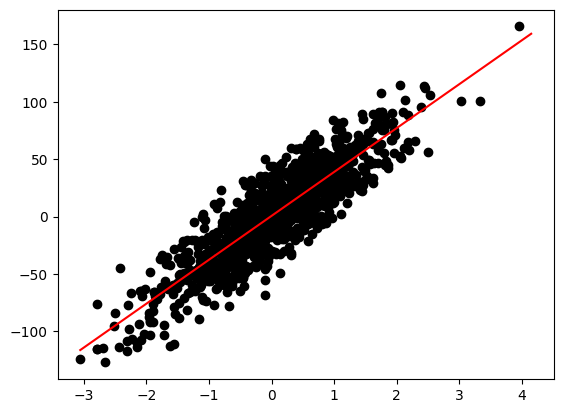

In [78]:

fig,ax = plt.subplots()
plt.scatter(X,Y,color =  "black")

# vẽ đường thẳng
line = np.arange(np.min(X[0,:]),np.max(X[0,:]) * 1.05, 0.1)
ax.plot(line,W[0,0]*line + b[0,0],"r")

plt.plot()
plt.show()

In [79]:
update_W

array([[44.23928776],
       [37.23282311],
       [38.44880662],
       [38.21944014],
       [38.26578467],
       [38.25594439],
       [38.25810248],
       [38.25761975],
       [38.25772899],
       [38.2577041 ],
       [38.25770979],
       [38.25770849],
       [38.25770879],
       [38.25770872],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38.25770873],
       [38

In [80]:
update_b

array([[ 2.4675834 ],
       [-0.07490783],
       [ 0.7599163 ],
       [ 0.53631708],
       [ 0.59171966],
       [ 0.57848065],
       [ 0.58158676],
       [ 0.58086503],
       [ 0.58103186],
       [ 0.5809934 ],
       [ 0.58100225],
       [ 0.58100022],
       [ 0.58100069],
       [ 0.58100058],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0.5810006 ],
       [ 0

In [81]:
update_loss

array([[898157.00665014],
       [220254.09163151],
       [201540.53747006],
       [200828.04774599],
       [200794.88618732],
       [200793.20796093],
       [200793.12056746],
       [200793.11597507],
       [200793.11573308],
       [200793.11572031],
       [200793.11571964],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [200793.1157196 ],
       [2007

Text(0.5, 0.92, 'surface')

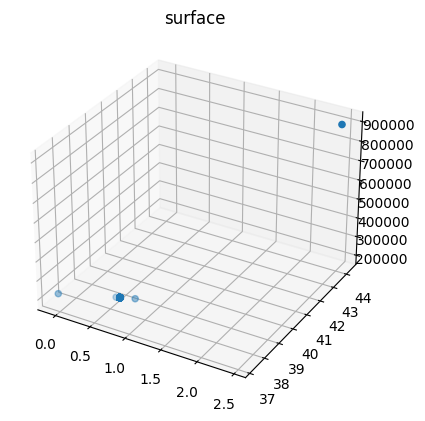

In [82]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
ax.scatter(update_b, update_W, update_loss)
ax.set_title('surface')